In [1]:
import pandas as pd
from joblib import load
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.base import TransformerMixin

In [2]:
df_twitter = pd.read_json("data/complaints_from_2020_01_01_to_2021_12_31__2022_03_22_twitter.json")

In [3]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 228 to 1959
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        576 non-null    int64         
 1   source_url                576 non-null    object        
 2   title                     576 non-null    object        
 3   overview                  508 non-null    object        
 4   outcome                   508 non-null    object        
 5   complaint_source          576 non-null    object        
 6   status                    576 non-null    object        
 7   platform                  576 non-null    object        
 8   asset_urls                576 non-null    object        
 9   asset_text_extracts       576 non-null    object        
 10  created_at                576 non-null    datetime64[ns]
 11  submitted_complaint_type  576 non-null    object        
 12  resolved_complaint_

In [4]:
df_test = df_twitter[["title","asset_text_extracts", "submitted_complaint_type", "resolved_complaint_type"]]

In [17]:
# class for cleaning the text
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
            return {}

def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

In [18]:
model = load('model/one-classSVM.joblib') 

In [19]:
model

Pipeline(steps=[('cleanText',
                 <__main__.CleanTextTransformer object at 0x000001BB53279BE0>),
                ('vectorizer', TfidfVectorizer(ngram_range=(2, 2))),
                ('clf', OneClassSVM(gamma=0.1, nu=0.1))])

In [20]:
predictions = model.predict(list(df_test["asset_text_extracts"]))

In [21]:
len(predictions)

576

In [22]:
df_pred = pd.DataFrame(predictions).reset_index()

In [23]:
df_pred

,index,0
0,0,1
1,1,1
2,2,-1
3,3,1
4,4,-1
...,...,...
571,571,1
572,572,1
573,573,1
574,574,1


In [26]:
test_twitter= pd.concat([df_test.reset_index(), df_pred], axis=1)

In [27]:
test_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     576 non-null    int64 
 1   title                     576 non-null    object
 2   asset_text_extracts       576 non-null    object
 3   submitted_complaint_type  576 non-null    object
 4   resolved_complaint_type   296 non-null    object
 5   index                     576 non-null    int64 
 6   0                         576 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 31.6+ KB


In [28]:
df_results = test_twitter.dropna().reset_index()

In [29]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   level_0                   296 non-null    int64 
 1   index                     296 non-null    int64 
 2   title                     296 non-null    object
 3   asset_text_extracts       296 non-null    object
 4   submitted_complaint_type  296 non-null    object
 5   resolved_complaint_type   296 non-null    object
 6   index                     296 non-null    int64 
 7   0                         296 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 18.6+ KB


In [30]:
del df_results["index"]

In [31]:
df_results["cat"] = df_results[0]

In [32]:
df_results.cat

0      1
1      1
2     -1
3     -1
4      1
      ..
291    1
292    1
293    1
294   -1
295    1
Name: cat, Length: 296, dtype: int64

In [33]:
del df_results[0]

In [35]:
cat_list = []
for item in df_results.cat:
    if item == -1:
        Class = "Not verified"
    elif item ==1:
        Class = "Verified"
    cat_list.append(Class)

In [36]:
df_results["Class"] = cat_list

In [40]:
df_results

,level_0,title,asset_text_extracts,submitted_complaint_type,resolved_complaint_type,cat,Class
0,0,Madagascar medicine 80% recovery rate,t2 Thailys Retweeted\nMarxist\n@Kgomo389\n#Mad...,Mis- or disinformation,Mis- or disinformation,1,Verified
1,1,Claim of white people being starved in South A...,Tweet\nBoerelegioen\n@Boerelegioen2\nPolice co...,Mis- or disinformation,Mis- or disinformation,1,Verified
2,2,Everything @Fred41848816: Tweets Containing Pu...,"Dear cleverblacks, mlungu is\nnot your friend\...",Hate speech,Hate speech,-1,Not verified
3,6,Death Certificates to reflect COVID19 without ...,to puti you...? @AdvoBarryRoux quickly\nvhat i...,Mis- or disinformation,Mis- or disinformation,-1,Not verified
4,8,D Lamula Tweet on Zimabweans,FA KE\n |,Hate speech,Mis- or disinformation,1,Verified
...,...,...,...,...,...,...,...
291,561,Twitter: Vaccination stations on Roadblocks,13:41\nLTE1 Vo)) 56%\nTweet\ncari Nienaus\n@ni...,Mis- or disinformation,Mis- or disinformation,1,Verified
292,563,Twitter: Tweeted photo falsely attributed to N...,46*\n0\nVoLTE\n(\n...\nK/s\nC655%\nI 18:15\nTh...,Mis- or disinformation,Mis- or disinformation,1,Verified
293,565,Twitter: Anti-vaxxer misinformation,&\nTweet\nReplying to\nIsrael admits on Israel...,Mis- or disinformation,Mis- or disinformation,1,Verified
294,566,Twitter: False and misleading statements about...,President Elect\n@tumelokh\nReplying to @A_C_D...,Mis- or disinformation,Mis- or disinformation,-1,Not verified


In [37]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   level_0                   296 non-null    int64 
 1   title                     296 non-null    object
 2   asset_text_extracts       296 non-null    object
 3   submitted_complaint_type  296 non-null    object
 4   resolved_complaint_type   296 non-null    object
 5   cat                       296 non-null    int64 
 6   Class                     296 non-null    object
dtypes: int64(2), object(5)
memory usage: 16.3+ KB


C:\Users\Mohlatlego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

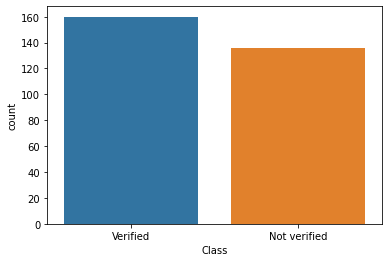

In [38]:
sns.countplot(df_results['Class'])

In [39]:
df_results['Class'].value_counts()

Verified        160
Not verified    136
Name: Class, dtype: int64

In [42]:
df_results.value_counts(['submitted_complaint_type','Class']) 

submitted_complaint_type  Class       
Mis- or disinformation    Verified        114
                          Not verified     78
Hate speech               Not verified     33
                          Verified         22
Incitement to violence    Verified         22
                          Not verified     21
Journalist Harrassment    Not verified      4
                          Verified          2
dtype: int64